In [1]:
from torch import tensor, tanh, sum
from matplotlib import pyplot as plt

import matplotlib
import torchviz

trainx = [ [0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0] ]
trainy = [ 0.0, 1.0, 1.0, 1.0 ]


inputs = tensor(trainx)
weights = tensor([2.0, 2.0], requires_grad=True)
bias = tensor([0.1], requires_grad=True)
parameters = [ weights, bias ]


In [15]:
stats = []


[[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]] 
 [0.0, 1.0, 1.0, 1.0] 
 tensor([5.6989e-04, 9.8803e-01, 9.8803e-01, 9.9993e-01],
       grad_fn=<TanhBackward0>) 
 tensor([ 5.6989e-04, -1.1966e-02, -1.1966e-02, -7.2539e-05],
       grad_fn=<SubBackward0>) 
 tensor([3.2477e-07, 1.4319e-04, 1.4319e-04, 5.2619e-09],
       grad_fn=<PowBackward0>) 
 tensor(0.0003, grad_fn=<SumBackward0>) 
 tensor([2.5558, 2.5558], requires_grad=True) 
 tensor([0.0006], requires_grad=True)
tensor([-0.0006, -0.0006])
tensor([1.1022e-06])


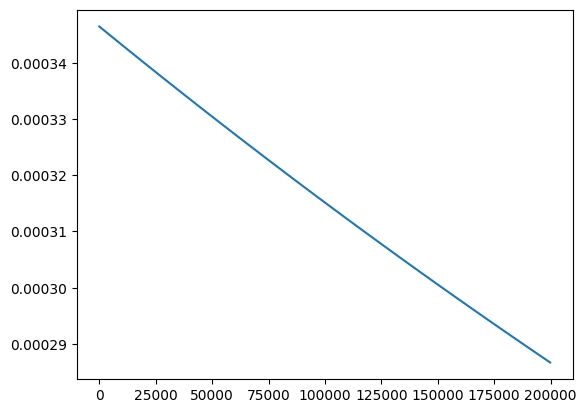

In [17]:

for i in range(100000):
    linear = inputs @ weights + bias
    nonlinear = tanh(linear)
    loss1 = nonlinear - tensor(trainy)
    loss2 = loss1**2
    loss3 = sum(loss2)
    if i % 1000:
        stats.append(loss3.data)

    for p in parameters:
        p.grad = None


    loss3.backward()
    lr = 0.0005
    for p in parameters:
        p.data = p.data - (lr * p.grad.data)

print( trainx, "\n", trainy, "\n", nonlinear, "\n", loss1, "\n", loss2, "\n", loss3, "\n", weights, "\n", bias )
for p in parameters:
    print(p.grad)
plt.plot(stats)